In [5]:
import pandas as pd

In [6]:
def loadData(filename):
    """
    Returns pandas dataframe containing data from tables in scratch of specified filename
    Inputs:
        filename: name of file to read, e.g. cardiovascular-satisfied_SchemaV3-v1.tsv
    """
    return pd.read_csv("/scratch/PI/euan/projects/mhc/data/tables/"+filename, sep = '\t') 
data3 = loadData('cardiovascular-satisfied_SchemaV3-v1.tsv')
data2 = loadData('cardiovascular-satisfied_SchemaV2-v1.tsv')
data1 = loadData('cardiovascular-satisfied-v1.tsv')

In [7]:
#HealthCodes to exclude (belong to testers):

toExclude = ['9e8aba99-bfed-493a-a154-e41249b2504b', 'd12117d5-dc96-4f96-8c70-61fcd0b5b6d9', 'ed1f2883-0612-4503-9a92-e5e2a38c6d7e',
'bd6321c0-9c4e-4a66-b9ea-18c1f1553fb7', '27591ae7-743d-4bb1-bd78-a34da3d254ac'] 

In [8]:
data1 = data1.sort_values(by=['createdOn'])
data1F = data1[data1['zip'].notnull()]
data1F

,ROW_ID,ROW_VERSION,recordId,healthCode,externalId,dataGroups,uploadDate,createdOn,appVersion,phoneInfo,feel_worthwhile1,feel_worthwhile2,feel_worthwhile3,feel_worthwhile4,riskfactors1,riskfactors2,riskfactors3,riskfactors4,satisfiedwith_life,zip
133,132,0,ae5b1349-84fe-469a-8696-32812d1a0d0a,d5788340-0a59-4837-b923-9ff1f1a52dbb,NaN,NaN,2015-03-09,2015-03-09 15:59:28,"version 1.0, build 4",iPhone 6 Plus,7.0,7.0,4.0,1.0,[1],[1],[3],[2],6.0,940.0
40,39,0,b3753248-97a0-48b9-94ef-212e08d82a8d,0609db3d-0e5e-47d4-9678-02455585efe7,NaN,NaN,2015-03-09,2015-03-09 21:11:08,"version 1.0, build 5.1",iPhone 5s (GSM+CDMA),5.0,3.0,7.0,8.0,[3],[3],[3],[4],5.0,117.0
78,77,0,86bbf06e-eb6d-45b3-ae03-8cbe805fbca8,1a509ff6-bef5-4ee9-a598-9de8c209c577,NaN,NaN,2015-03-09,2015-03-09 21:22:32,"version 1.0, build 5.1",iPhone 4S,5.0,4.0,9.0,9.0,[2],[3],[2],[3],6.0,123.0
140,139,0,02a38dd6-4a38-4177-a763-5ce82e5d5d1f,c59cf641-f9e8-4887-a66e-7f875292eee1,NaN,NaN,2015-03-09,2015-03-09 21:35:27,"version 1.0, build 5.1",iPhone 5c (GSM),6.0,5.0,6.0,4.0,[2],[3],[3],[3],6.0,995.0
26,25,0,a2edcbb4-1741-4cc5-8abd-126151ec355a,3bf953f9-73bf-4d45-81c3-667a8daf0494,NaN,NaN,2015-03-09,2015-03-09 22:11:08,"version 1.0, build 5.1",iPhone 5s (GSM+CDMA),8.0,8.0,2.0,0.0,[1],[1],[2],[1],8.0,200.0
6,5,0,a7d8e4a3-7987-4162-8467-4829b95a9321,14a8a1c5-3346-4521-acdf-fda0b0f3b34d,NaN,NaN,2015-03-09,2015-03-09 22:17:08,"version 1.0, build 5.1",iPhone 5s (GSM),5.0,7.0,5.0,3.0,[2],[2],[2],[2],7.0,652.0
116,115,0,524e5eab-a54e-4afb-a6d2-7d11430b6a35,7433f8e7-714d-4ae6-bf6f-afcb32f4f1dc,NaN,NaN,2015-03-09,2015-03-09 23:07:20,"version 1.0, build 5.1",iPhone 4S,10.0,4.0,0.0,0.0,[1],[1],[1],[1],9.0,986.0
31,30,0,5987d99c-2356-4925-97f6-fd9d2feb038d,909ae610-8c17-4047-8b4b-733251e3205c,NaN,NaN,2015-03-09,2015-03-09 23:10:50,"version 1.0, build 5.1",iPhone 6,8.0,8.0,2.0,0.0,[3],[3],[3],[3],8.0,407.0
132,131,0,24da991e-f1d3-4349-be7c-862d03c7a7d1,79c64f3b-a41f-4634-8eed-f12d2938a76d,NaN,NaN,2015-03-09,2015-03-09 23:49:38,"version 1.0, build 5.1",iPhone 6 Plus,6.0,6.0,5.0,2.0,[1],[2],[3],[3],8.0,950.0
66,65,0,b7895569-6a54-41f7-b7c8-0b5fb198714a,efdff1c9-456e-4b59-8e95-c228ea6209f0,NaN,NaN,2015-03-09,2015-03-10 00:06:04,"version 1.0, build 5.1",iPhone 5s (GSM+CDMA),2.0,1.0,9.0,10.0,[1],[1],[1],[1],1.0,100.0


In [9]:
def idToZip(data):
    """
    Returns a dictionary mapping user ID (healthCode) to self-reported zipcodes
    Inputs:
        data: pandas dataframe containing cardiovascular-satisfied-xxx.tsv format responses including healthCode, country and numericZip variables
    """
    #Identify df type and extract column title
    if 'numericZip' in data.columns:
        zipCol = 'numericZip'
    else:
        zipCol = 'zip'
    
    code2zip = {}
    data = data[~data[zipCol].isnull()]
    for pair in zip(data['healthCode'], data[zipCol]):
        zipCode = ''.join([x for x in str(pair[1]) if x != "."])
        if zipCode.isdigit():
            zipCode = ''.join([x for x in zipCode if x.isdigit()])
            if len(zipCode) == 2:
                zipCode = "0" + zipCode
            if pair[0] not in code2zip.keys():
                code2zip[pair[0]] = [zipCode[:3]]
            else:
                code2zip[pair[0]].append(zipCode[:3])
    return code2zip
def idToZipUnique(data, code2zip = {}):
    """
    Returns a dictionary mapping user ID (healthCode) to self-reported zipcodes
    Inputs:
        data: pandas dataframe containing cardiovascular-satisfied-xxx.tsv format responses including healthCode, country and numericZip variables
    """
    #Identify df type and extract column title
    if 'numericZip' in data.columns:
        zipCol = 'numericZip'
    else:
        zipCol = 'zip'
    data = data[~data[zipCol].isnull()]
    for pair in zip(data['healthCode'], data[zipCol], data['createdOn']):
        zipCode = ''.join([x for x in str(pair[1]) if x != "."])
        if zipCode.isdigit():
            zipCode = ''.join([x for x in zipCode if x.isdigit()])
            if len(zipCode) == 2:
                zipCode = "0" + zipCode
            if pair[0] not in code2zip.keys():
                code2zip[pair[0]] = (zipCode[:3], pair[2])
            elif code2zip[pair[0]][1] >= pair[2]:
                code2zip[pair[0]] = (zipCode[:3], pair[2])
    return code2zip

In [10]:
def mergeIdsToZips(dict1, dict2):
    """
    Returns a merge of two dictionaries mapping healthCodes to zips into one resulting dictionary
    """
    if len(dict1)==0 and len(dict2)==0:
        return {}
    for k, v in dict2.items():
        if k in dict1.keys():
            for x in v:
                dict1[k].append(x)
        else:
            dict1[k] = v
    return dict1
    

In [11]:
def getSummaryFromZip(code2zip):
    """
    Returns summary statistics from code to zipcode dictionary
    Inputs:
        code2zip: dictionary mapping user healthCode to list of zip codes
    Outputs:
        Average number of user entries, average different types of user entries
    """
    code2numAns = {}
    code2diffZips = {}
    for k, v in code2zip.items():
        code2numAns[k] = len(v)
        code2diffZips[k] = len(set(v))

    return code2numAns, code2diffZips

In [12]:
zipSchemaV3 = idToZip(data3)
zipSchemaV2 = idToZip(data2)
zipSchemaV1 = idToZip(data1)


In [13]:
mergeV2V3 = mergeIdsToZips(zipSchemaV2, zipSchemaV3)
zips = mergeIdsToZips(zipSchemaV1, mergeV2V3)

In [14]:
print(len(zipSchemaV3))
print(len(zipSchemaV2))
print(len(zipSchemaV1))

7070
8446
26719


In [15]:
print(len(zips))

26719


In [16]:
numReplies,numDiffReplies = getSummaryFromZip(zips)
# print(getSummaryFromZip(zipSchemaV3))
# print(getSummaryFromZip(zipSchemaV2))
# print(getSummaryFromZip(zipSchemaV1))
numReplies

{'d5788340-0a59-4837-b923-9ff1f1a52dbb': 1,
 '0609db3d-0e5e-47d4-9678-02455585efe7': 1,
 '1a509ff6-bef5-4ee9-a598-9de8c209c577': 1,
 'c59cf641-f9e8-4887-a66e-7f875292eee1': 1,
 '3bf953f9-73bf-4d45-81c3-667a8daf0494': 1,
 '14a8a1c5-3346-4521-acdf-fda0b0f3b34d': 2,
 '7433f8e7-714d-4ae6-bf6f-afcb32f4f1dc': 2,
 '909ae610-8c17-4047-8b4b-733251e3205c': 1,
 '79c64f3b-a41f-4634-8eed-f12d2938a76d': 1,
 'efdff1c9-456e-4b59-8e95-c228ea6209f0': 2,
 '7946ca04-7a75-4ac7-ad54-27a6fbe8b37f': 2,
 'a205f783-8652-4722-9dde-9c3fa769e45d': 1,
 '021aed64-d251-4ce8-8ea9-70113d4494d4': 3,
 '8fcf5ac6-067b-4e45-9b9c-71a7fe3e4fe5': 1,
 '11717025-1091-492c-ae96-5a3123461af4': 2,
 '13416833-92d2-4061-a0ab-3d9cc8f89cf2': 3,
 '0cb5e650-3467-43c8-b62e-c370ac56cd62': 1,
 'cd918bc1-62e9-468d-bb54-8ed7a491572d': 1,
 'f3e0c587-7a61-4f73-8cd0-05bf4a16dda0': 2,
 '051e44b0-350f-4a36-9111-809ee3256812': 1,
 '4cf161c0-233e-49bb-b057-72ae061f64df': 21,
 'e5d1f16d-4c23-410b-a913-6f27ffda84de': 1,
 '8461cf9a-b294-463e-94ce-27d25

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

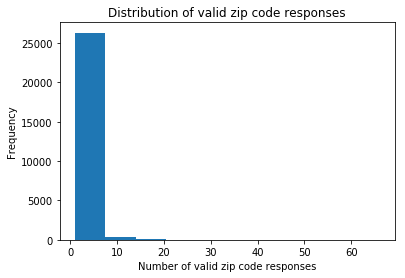

In [18]:
plt.hist(numReplies.values())
plt.xlabel('Number of valid zip code responses')
plt.ylabel('Frequency')
plt.title('Distribution of valid zip code responses')
plt.show()

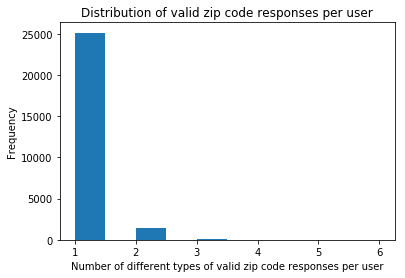

In [19]:
plt.hist(numDiffReplies.values())
plt.xlabel('Number of different types of valid zip code responses per user')
plt.ylabel('Frequency')
plt.title('Distribution of valid zip code responses per user')
plt.show()

In [20]:
floats = [7.0, 9.25, 925.0, 'NaN']
for f in floats:
    if f != 'NaN':
        print(f > 99.9 and f < 1000)

False
False
True


In [21]:
for k,v in numDiffReplies.items():
    if v==6:
        print(str(k) + ": " + str(zips[k]))

d36a77de-f66d-4357-b6b1-1755bafa1139: ['856', '856', '856', '856', '856', '973', '973', '973', '974', '974', '974', '602', '856', '856', '856', '853', '856', '974', '974', '974', '972', '973', '973', '974', '974', '973', '973', '974', '974']
0a6eb7f8-c05d-4119-bfe0-f0e233d9f747: ['400', '403', '433', '043', '340', '430', '430']
0a663136-6424-4961-9b44-46dc86a5066b: ['110', '110', '211', '210', '210', '921', '270', '210', '921', '921', '920', '921']


In [19]:
for k,v in numReplies.items():
    if v==66:
        print(str(k) + ": " + str(zips[k]))

afcc16dd-0dd5-4e2b-9656-3143d8dc80fc: ['294', '924', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '455', '294', '294', '294', '294', '294', '294', '294', '294', '264', '264', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '455', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294']


In [25]:
zipCount = {}
for val in zips.values():
    for v in val:
        if v not in zipCount.keys():
            zipCount[v] = 1
        else:
            zipCount[v] += 1

In [26]:
len([x for x in numReplies.values() if x > 8])

317

(array([821.,  72.,  13.,  14.,   3.,   1.,   2.,   2.,   0.,   1.]),
 array([1.0000e+00, 1.2520e+02, 2.4940e+02, 3.7360e+02, 4.9780e+02,
        6.2200e+02, 7.4620e+02, 8.7040e+02, 9.9460e+02, 1.1188e+03,
        1.2430e+03]),
 <a list of 10 Patch objects>)

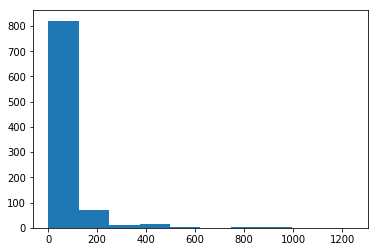

In [27]:
plt.hist(zipCount.values())

In [28]:
zipAtLeast10 = {k:v for k,v in zipCount.items() if v > 9}
len(zipAtLeast10)

618

In [29]:
sum(zipAtLeast10.values())

51286

In [30]:
zipAtLeast10

{'940': 1243,
 '117': 245,
 '123': 109,
 '995': 101,
 '200': 401,
 '652': 66,
 '986': 81,
 '407': 12,
 '950': 751,
 '100': 952,
 '483': 121,
 '258': 22,
 '350': 42,
 '902': 323,
 '631': 186,
 '523': 23,
 '201': 245,
 '479': 47,
 '212': 169,
 '190': 238,
 '373': 71,
 '110': 80,
 '875': 62,
 '730': 168,
 '495': 85,
 '610': 56,
 '197': 47,
 '713': 15,
 '297': 52,
 '347': 135,
 '275': 225,
 '481': 249,
 '220': 166,
 '222': 184,
 '454': 88,
 '150': 91,
 '921': 477,
 '070': 42,
 '830': 20,
 '441': 174,
 '208': 285,
 '119': 31,
 '540': 85,
 '405': 56,
 '440': 134,
 '680': 112,
 '321': 73,
 '410': 76,
 '331': 447,
 '191': 222,
 '151': 63,
 '111': 118,
 '231': 54,
 '230': 66,
 '112': 428,
 '234': 99,
 '480': 164,
 '450': 101,
 '442': 48,
 '395': 44,
 '630': 134,
 '731': 95,
 '391': 25,
 '300': 426,
 '606': 607,
 '605': 174,
 '494': 71,
 '531': 95,
 '751': 36,
 '604': 123,
 '719': 20,
 '210': 552,
 '535': 68,
 '376': 28,
 '774': 148,
 '310': 70,
 '180': 164,
 '900': 512,
 '951': 637,
 '160': 38,

In [31]:
with open('./zipCountAtLeast10.txt', 'w') as fout:
    fout.write('ZIP3\tCount\n')
    for k,v in zipAtLeast10.items():
        fout.write(str(k) + '\t' + str(v) + '\n')

In [32]:
pd.read_csv('./zipCountAtLeast10.txt', sep='\t').sort_values(by=['Count'], ascending=False)

,ZIP3,Count
0,940,1243
112,941,971
9,100,952
147,945,834
8,950,751
78,951,637
64,606,607
71,210,552
77,900,512
136,600,482


In [33]:
uniqueID2Zip = idToZipUnique(data1)
uniqueID2Zip = idToZipUnique(data2, uniqueID2Zip)
uniqueID2Zip = idToZipUnique(data3, uniqueID2Zip)

for u in toExclude:
    uniqueID2Zip.pop(u, None)

In [34]:
with open('./data/id2ZipNDate','w') as fout:
    for k,v in uniqueID2Zip.items():
        line = '\t'.join([k, v[0], v[1][:10]])
        fout.write(line+'\n')